# Business Case Study: Employee Absenteeism

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.



# The business Task

The exercise will address `Absenteeism` at a company during work time.

**Problem:** 
The problem is that the work environment of today is more:
- Competitive
- Managers set unachievable business goals
- have an elevated risk of becoming unemployed
This can be lead to an increase in pressure and stress of the employee. Those factors influence employee health, which is of course indesirable.

### What is Absenteeism?
Absence from work during normal working hours resulting in temporary incapacity to execute a regular working activity.

- Based on what information should we predict whether an employee is expected to be absent or not?
- How should we measure absenteeism?

### Purpose of the business exercise:

Explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not.

We want to know for how many working hours any employee could be away from work based on information like:
- How far they live from their workplace.
- How many children and pets they have.
- Do they have higher education?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('data/Absenteeism_data.csv')
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
ID                           700 non-null int64
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


The data doesn't have any missing values.

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,17.95,19.41,222.35,29.89,36.42,271.80,26.74,1.28,1.02,0.69,6.76
std,11.03,8.36,66.31,14.80,6.38,40.02,4.25,0.67,1.11,1.17,12.67
min,1.00,0.00,118.00,5.00,27.00,205.92,19.00,1.00,0.00,0.00,0.00
25%,9.00,13.00,179.00,16.00,31.00,241.48,24.00,1.00,0.00,0.00,2.00
50%,18.00,23.00,225.00,26.00,37.00,264.25,25.00,1.00,1.00,0.00,3.00
75%,28.00,27.00,260.00,50.00,40.00,294.22,31.00,1.00,2.00,1.00,8.00
max,36.00,28.00,388.00,52.00,58.00,378.88,38.00,4.00,4.00,8.00,120.00


In [5]:
for column in data.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Max: {data[column].max()}")
    print(f"Min: {data[column].min()}")

===============Column: ID==============
Number of unique values: 34
Max: 36
Min: 1
===============Column: Reason for Absence==============
Number of unique values: 28
Max: 28
Min: 0
===============Column: Date==============
Number of unique values: 432
Max: 31/10/2017
Min: 01/01/2018
===============Column: Transportation Expense==============
Number of unique values: 24
Max: 388
Min: 118
===============Column: Distance to Work==============
Number of unique values: 24
Max: 52
Min: 5
===============Column: Age==============
Number of unique values: 21
Max: 58
Min: 27
===============Column: Daily Work Load Average==============
Number of unique values: 35
Max: 378.884
Min: 205.917
===============Column: Body Mass Index==============
Number of unique values: 16
Max: 38
Min: 19
===============Column: Education==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Children==============
Number of unique values: 5
Max: 4
Min: 0
===============Column: Pets=============

In [6]:
data.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

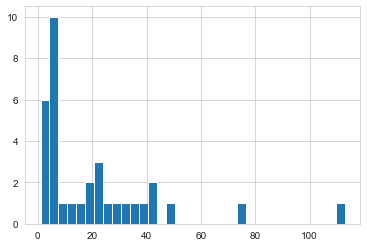

In [7]:
data.ID.value_counts().hist(bins=data.ID.nunique())

`ID`: individual identification (in this case we have 34 employees) indicates precisely who has been away during working hours.  Will this information improve our analysis in any way? No, because it's only a label variable (a number that is there to distinguish the individuals from one another, not to carry any numeric information).

So we are going to drop this column

In [8]:
data.drop('ID', axis=1, inplace=True)

`Reason for Absence`: We have `28` reason of absence from `0` to `28`.

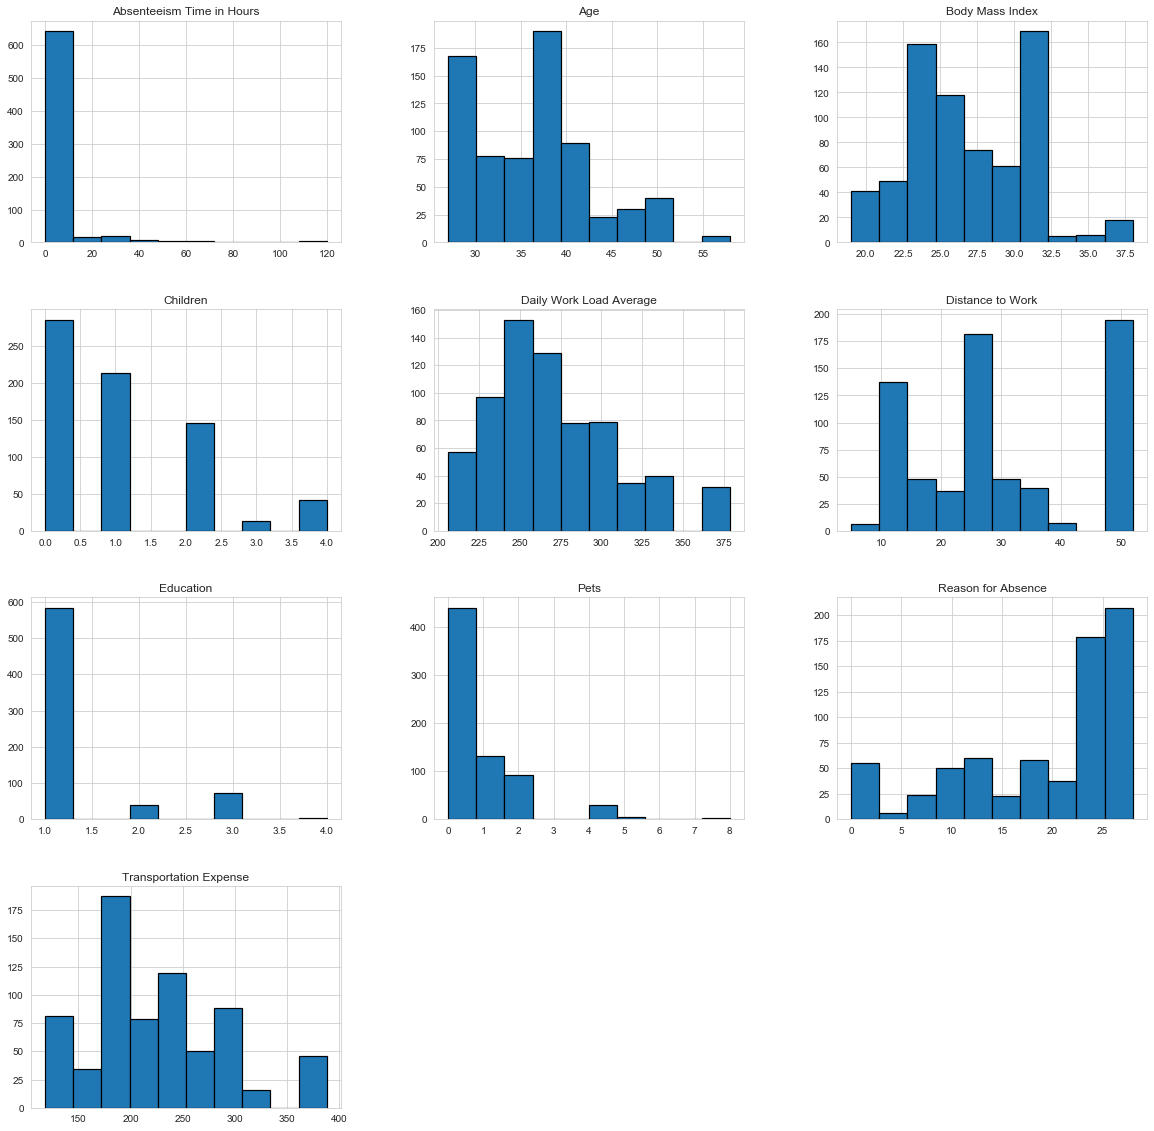

In [9]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [10]:
print(f"{data['Absenteeism Time in Hours'].value_counts()}")
print(f"{data['Absenteeism Time in Hours'].value_counts()[0] / data['Absenteeism Time in Hours'].value_counts()[1]}")

8      195
2      149
3      106
1       87
4       57
0       39
16      18
24      15
40       7
5        7
32       6
64       3
112      2
56       2
80       2
120      2
48       1
7        1
104      1
Name: Absenteeism Time in Hours, dtype: int64
0.4482758620689655


In [11]:
data["Reason for Absence"].value_counts()

23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
6       6
21      6
8       5
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for Absence, dtype: int64

In [12]:
data["Reason for Absence"] = data["Reason for Absence"].map({0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1", 
                                                             4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1", 
                                                             8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1", 
                                                             12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2", 
                                                             16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3", 
                                                             19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4", 
                                                             23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4", 
                                                             27: "Group_4", 28: "Group_4"})
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason for Absence"].value_counts()

Group_4    418
Group_1    213
Group_3     63
Group_2      6
Name: Reason for Absence, dtype: int64

In [13]:
data_1 = pd.get_dummies(data, columns=['Reason for Absence'])

In [14]:
data_1.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence_Group_1,Reason for Absence_Group_2,Reason for Absence_Group_3,Reason for Absence_Group_4
0,07/07/2015,289,36,33,239.55,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.55,31,1,1,0,0,1,0,0,0
2,15/07/2015,179,51,38,239.55,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.55,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.55,30,1,2,1,2,0,0,0,1


In [15]:
data_1.dtypes

Date                           object
Transportation Expense          int64
Distance to Work                int64
Age                             int64
Daily Work Load Average       float64
Body Mass Index                 int64
Education                       int64
Children                        int64
Pets                            int64
Absenteeism Time in Hours       int64
Reason for Absence_Group_1      uint8
Reason for Absence_Group_2      uint8
Reason for Absence_Group_3      uint8
Reason for Absence_Group_4      uint8
dtype: object

In [16]:
data_1["Date"] = pd.to_datetime(data_1.Date)

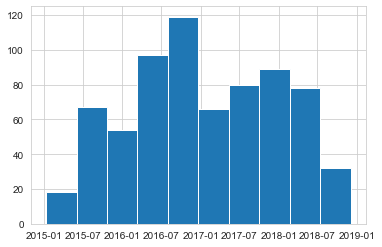

In [17]:
data_1.Date.hist()

In [18]:
data_1['Month'] = data_1.Date.dt.month
data_1.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence_Group_1,Reason for Absence_Group_2,Reason for Absence_Group_3,Reason for Absence_Group_4,Month
0,2015-07-07,289,36,33,239.55,30,1,2,1,4,0,0,0,1,7
1,2015-07-14,118,13,50,239.55,31,1,1,0,0,1,0,0,0,7
2,2015-07-15,179,51,38,239.55,31,1,0,0,2,0,0,0,1,7
3,2015-07-16,279,5,39,239.55,24,1,2,0,4,1,0,0,0,7
4,2015-07-23,289,36,33,239.55,30,1,2,1,2,0,0,0,1,7


In [19]:
data_1["Weekday"] = data_1.Date.dt.weekday
data_1["Weekday"]

0      1
1      1
2      2
3      3
4      3
      ..
695    2
696    2
697    3
698    3
699    3
Name: Weekday, Length: 700, dtype: int64

In [20]:
data_1.dtypes

Date                          datetime64[ns]
Transportation Expense                 int64
Distance to Work                       int64
Age                                    int64
Daily Work Load Average              float64
Body Mass Index                        int64
Education                              int64
Children                               int64
Pets                                   int64
Absenteeism Time in Hours              int64
Reason for Absence_Group_1             uint8
Reason for Absence_Group_2             uint8
Reason for Absence_Group_3             uint8
Reason for Absence_Group_4             uint8
Month                                  int64
Weekday                                int64
dtype: object

In [21]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})

In [22]:
data_1.Education.value_counts()

0    583
1    117
Name: Education, dtype: int64

In [23]:
data_1.Education.unique()

array([0, 1], dtype=int64)

In [43]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Reason for Absence_Group_1',
       'Reason for Absence_Group_2', 'Reason for Absence_Group_3',
       'Reason for Absence_Group_4', 'Month', 'Weekday', 'Education_1'],
      dtype='object')

In [44]:
data_2.drop('Date', axis=1, inplace=True)

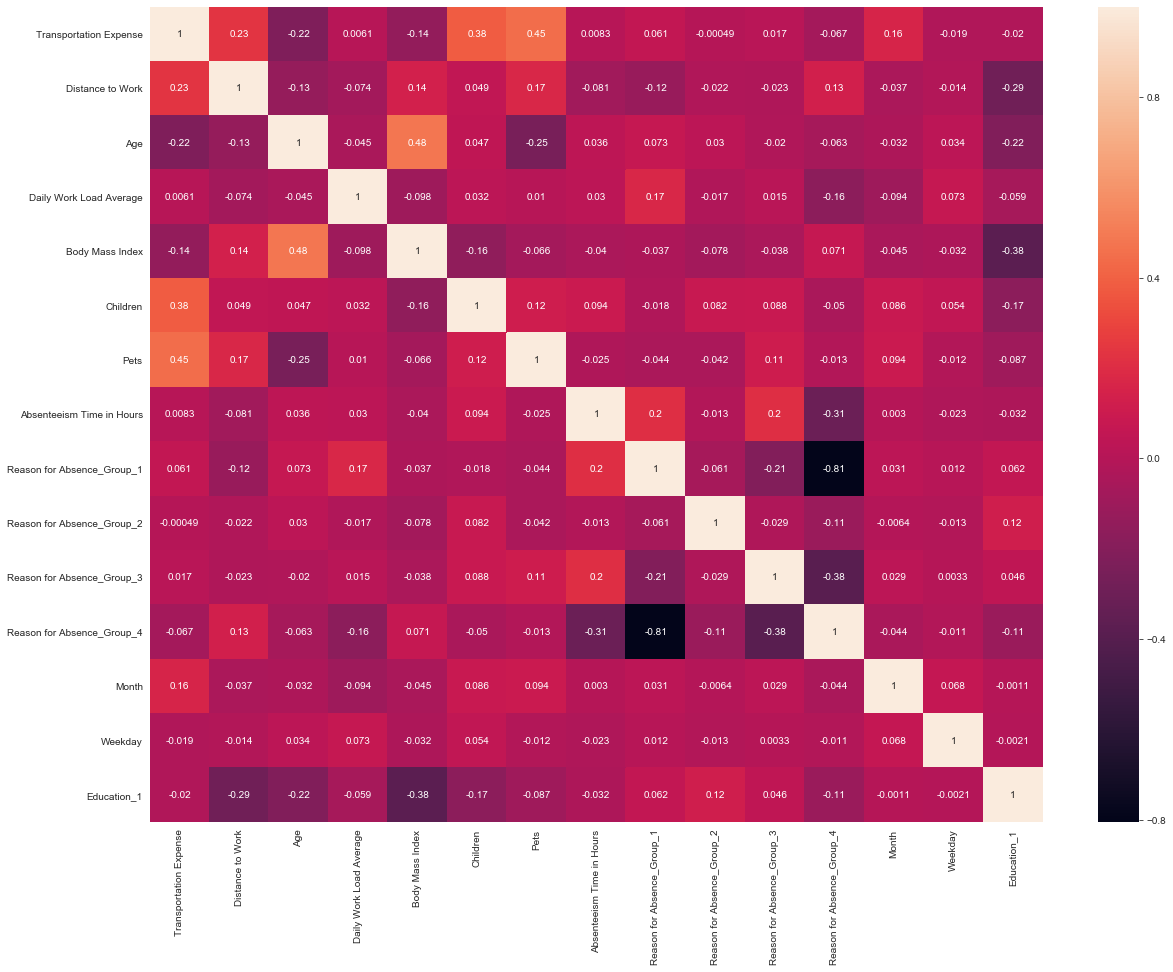

In [45]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_2.corr(), annot=True)

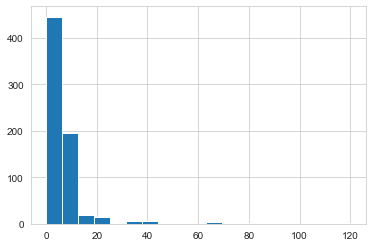

In [46]:
data_2['Absenteeism Time in Hours'].hist(bins=data_2['Absenteeism Time in Hours'].nunique())

In [47]:
# data_2.drop(["Distance to Work", "Month", "Weekday", "Age", "Daily Work Load Average"], 
#             axis=1, inplace=True)

# Applying machine learning algorthims

In [48]:
X = data_2.drop('Absenteeism Time in Hours', axis=1)
y = np.where(data_2["Absenteeism Time in Hours"] > data_2["Absenteeism Time in Hours"].median(), 1, 0)

print(X.shape)
print(y.shape)

(700, 14)
(700,)


In [49]:
y.sum() / y.shape[0]

0.45571428571428574

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(solver="liblinear")

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=20)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

def accuracy_report(y_test, y_test_pred, sample="Test"):
    print(f"========={sample} data============ :\n=>Accuracy Score {accuracy_score(y_test, y_test_pred)}")
    print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

In [52]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.7125
=>Confusion Matrix :
[[240  67]
 [ 94 159]]


In [56]:
accuracy_report(y_test, y_test_pred, "Test")

=========Test data============ :
=>Accuracy Score 0.7
=>Confusion Matrix :
[[57 17]
 [25 41]]


In [58]:
model.score(X_train, y_train)

0.7125

In [35]:
scores = cross_val_score(model, X_std, y, cv=10)
scores.mean()

0.678540226868457

In [36]:
model.intercept_

array([-0.16687898])

In [37]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
feature_name = X.columns
summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(model.coef_)
summary_table

,Features_name,Coefficients
0,Transportation Expense,0.57
1,Distance to Work,-0.01
2,Age,-0.19
3,Daily Work Load Average,-0.01
4,Body Mass Index,0.22
5,Children,0.28
6,Pets,-0.31
7,Reason for Absence_Group_1,0.17
8,Reason for Absence_Group_2,-0.01
9,Reason for Absence_Group_3,0.51


In [39]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table.sort_index(inplace=True)

In [40]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values(by="Odds_ratio", ascending=False)

,Features_name,Coefficients,Odds_ratio
1,Transportation Expense,0.57,1.77
10,Reason for Absence_Group_3,0.51,1.66
6,Children,0.28,1.32
5,Body Mass Index,0.22,1.25
8,Reason for Absence_Group_1,0.17,1.19
2,Distance to Work,-0.01,0.99
9,Reason for Absence_Group_2,-0.01,0.99
4,Daily Work Load Average,-0.01,0.99
12,Month,-0.02,0.98
13,Weekday,-0.05,0.95


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

random_forest_grid = GridSearchCV(rf_model, param_grid, scoring="accuracy", 
                                  n_jobs=-1, verbose=1, cv=3, iid=True)

random_forest_grid.fit(X_train, y_train)

y_train_pred = random_forest_grid.predict(X_train)
y_test_pred = random_forest_grid.predict(X_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   33.2s finished


In [64]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.7285714285714285
=>Confusion Matrix :
[[53 21]
 [17 49]]


In [65]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.8589285714285714
=>Confusion Matrix :
[[268  39]
 [ 40 213]]


In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

gbm_model.fit(X_train, y_train)

y_train_pred = gbm_model.predict(X_train)
y_test_pred = gbm_model.predict(X_test)

In [68]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.7285714285714285
=>Confusion Matrix :
[[55 19]
 [19 47]]


In [69]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.8482142857142857
=>Confusion Matrix :
[[268  39]
 [ 46 207]]


In [84]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }

xgb_model = xgb.XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50, scoring = 'accuracy',n_jobs =-1,
                               verbose = 5, return_train_score = True, random_state=42)


xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.3min finished
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [88]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                         colsample_bynode=1, colsample_bytree=1, gamma=0,
                         learning_rate=0.1, max_delta_step=0, max_depth=2,
                         min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                         nthread=None, objective='binary:logistic', random_state=0,
                         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=None, subsample=1, verbosity=1)

In [92]:
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [93]:
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

In [94]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.7214285714285714
=>Confusion Matrix :
[[53 21]
 [18 48]]


In [95]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.7696428571428572
=>Confusion Matrix :
[[243  64]
 [ 65 188]]


# Save the model

In [87]:
import pickle

with open('model', 'wb') as file:
    pickle.dump(xgb_best, file)